# Noise reduction

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage.util import random_noise

# Load the image
image = cv2.imread("dataset/cameraman.tif", 0)

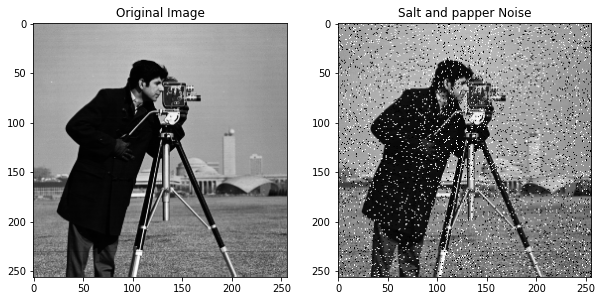

In [21]:
def add_salt_and_papper_noise(img):
    
    # Add salt-and-pepper noise to the image.
    noise_img = random_noise(img, mode='s&p',amount=0.1)
    
    # The above function returns a floating-point image
    # on the range [0, 1], thus we changed it to 'uint8'
    # and from [0,255]
    noise_img = np.array(255*noise_img, dtype = 'uint8')


    # Display images
    plt.figure(figsize=(10, 10))
    plt.subplot(121), plt.title("Original Image")
    plt.imshow(img, cmap="gray")

    plt.subplot(122), plt.title("Salt and papper Noise")
    plt.imshow(noise_img, cmap="gray")

    plt.show()

    return noise_img


noisy_image = add_salt_and_papper_noise(image)

## Noise reduction using Mean Filter

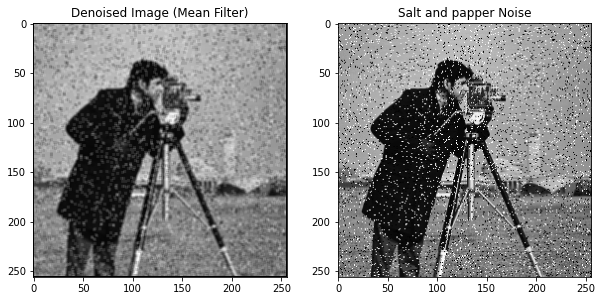

In [22]:
import numpy as np
  

def mean_filter(img, mask_size):

    row, col = len(img), len(img[0])

    # Develop Averaging filter mask
    mask = np.ones([mask_size, mask_size], dtype = int)
    mask = mask / 9

    # Convolve the mask over the image
    img_new = np.zeros([row, col])
    
    for i in range(1, row-1):
        for j in range(1, col-1):
            temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
            img_new[i, j]= temp
            
    img_new = img_new.astype(np.uint8)
    return img_new



denoise_img = mean_filter(noisy_image, 3)

# Display images
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.title("Denoised Image (Mean Filter)")
plt.imshow(denoise_img, cmap="gray")

plt.subplot(122), plt.title("Salt and papper Noise")
plt.imshow(noisy_image, cmap="gray")

plt.show()

## Noise reduction using Median Filter

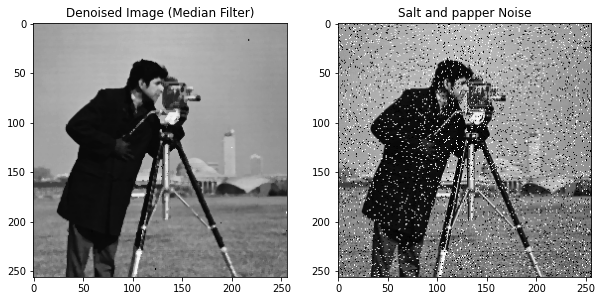

In [23]:
from scipy.ndimage import median_filter


# Median Spatial Domain Filtering
denoise_img = median_filter(noisy_image, size=3)

# Display images
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.title("Denoised Image (Median Filter)")
plt.imshow(denoise_img, cmap="gray")

plt.subplot(122), plt.title("Salt and papper Noise")
plt.imshow(noisy_image, cmap="gray")


# Example2: Gaussian Noise Reduction

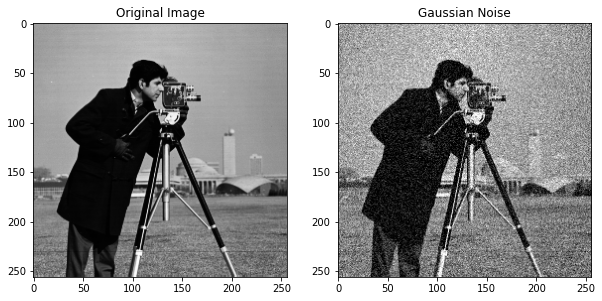

In [56]:
def add_gaussian_noise(img):
    
    # Add salt-and-pepper noise to the image.
    noise_img = random_noise(img, mode='gaussian', var=0.01)
    
    # The above function returns a floating-point image
    # on the range [0, 1], thus we changed it to 'uint8'
    # and from [0,255]
    noise_img = np.array(255*noise_img, dtype = 'uint8')
    
    # Display images
    plt.figure(figsize=(10, 10))
    plt.subplot(121), plt.title("Original Image")
    plt.imshow(img, cmap="gray")

    plt.subplot(122), plt.title("Gaussian Noise")
    plt.imshow(noise_img, cmap="gray")

    plt.show()

    return noise_img

noisy_image = add_gaussian_noise(image)

## Median filter

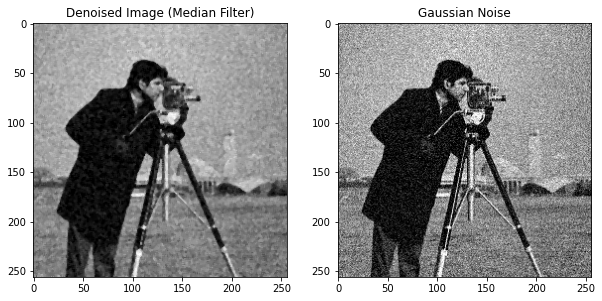

In [59]:
denoise_img = median_filter(noisy_image, size=3)


# Display images
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.title("Denoised Image (Median Filter)")
plt.imshow(denoise_img, cmap="gray")

plt.subplot(122), plt.title("Gaussian Noise")
plt.imshow(noisy_image, cmap="gray")


## Gaussian Filter

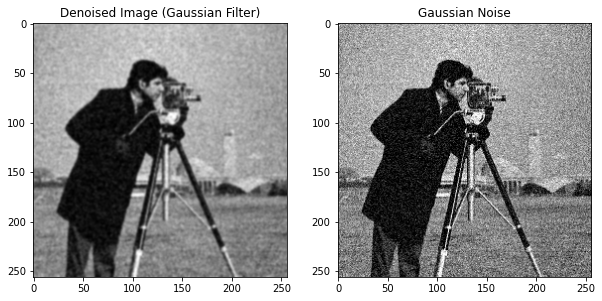

In [65]:
from scipy.ndimage import gaussian_filter


denoise_img = gaussian_filter(noisy_image, sigma=(1))


# Display images
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.title("Denoised Image (Gaussian Filter)")
plt.imshow(denoise_img, cmap="gray")

plt.subplot(122), plt.title("Gaussian Noise")
plt.imshow(noisy_image, cmap="gray")


## How does a Gaussian filter work?

In the process of using Gaussian Filter on an image we firstly define the size of the Kernel/Matrix that would be used for demising the image. The sizes are generally odd numbers, i.e. the overall results can be computed on the central pixel. Also the Kernels are symmetric & therefore have the same number of rows and column. The values inside the kernel are computed by the Gaussian function, which is as follows:

![gaussian](dataset/imgs/gaussian5.png)

Using the above function a gaussian kernel of any size can be calculated, by providing it with appropriate values. A 3×3 Gaussian Kernel Approximation(two-dimensional) with Standard Deviation = 1, appears as follows:

![gaussian](dataset/imgs/gaussian6.png)

## for example 
![gaussian](dataset/imgs/gaussian7.png)

In this example we have a 3x3 Gaussian kernel with a standard deviation = 0.5
So we can calculate the exact amount of Gaussian kernel pixels with the formula:

**G(x,y)=  [1/(2πσ^2)] * [e^(-(x^2 + y^2)/(2σ^2))]**

```
P0: x = -1, y = -1===> 0.0116
P1: x = 0, y = -1 ===> 0.0861
P2: x = 1, y = -1 ===> 0.0116
P3: x = -1, y = 0 ===> 0.0861
P4: x = 0, y = 0  ===> 0.6366
P5: x = 1, y = 0  ===> 0.0861
P6: x = -1, y = 1 ===> 0.0116
P7: x = 0, y = 1  ===> 0.0861
P8: x = 1, y = 1  ===> 0.0116
```

Now, convolve the Gaussian kernel in the original image and we have the output. This example was implemented in Python and you can see its output below.

![gaussian](dataset/imgs/gaussian8.png)

### Implement the above example in Python

In [1]:
from scipy.ndimage import gaussian_filter

img_matrix = [
    [202, 195, 192, 191],
    [216, 211, 200, 209],
    [224, 212, 215, 227],
    [224, 205, 227, 230]
]

print(gaussian_filter(img_matrix, sigma=0.5))


# output:
# [[202 196 192 192] 
#  [214 208 201 208] 
#  [221 212 214 223] 
#  [221 209 223 228]]


[[202 196 192 192]
 [214 208 201 208]
 [221 212 214 223]
 [221 209 223 228]]
